In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
import scipy.stats as st

In [3]:
tit=pd.read_csv('titanic_train.csv')

In [4]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
tit.shape

(891, 12)

In [6]:
tit.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
tit.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Univariate Analysis

In [11]:
# value_counts()

# Graphs:--
# Bar
# Box
# Dist
# Count
# line

In [14]:
col=tit.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Age', 'Cabin'], axis=1).columns.values
col

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [15]:
for i in col:
    print(tit[i].value_counts())
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64




In [17]:
# transformation is required before making plots

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
tit['Sex']=le.fit_transform(tit['Sex'])

In [27]:
st.mode(tit['Embarked'])

ModeResult(mode=array(['S'], dtype=object), count=array([644]))

In [28]:
# Embarked have some missing values in it
tit['Embarked']=tit['Embarked'].replace(np.NaN, 'S')

In [29]:
tit['Embarked']=le.fit_transform(tit['Embarked'])

<Figure size 2160x2160 with 0 Axes>

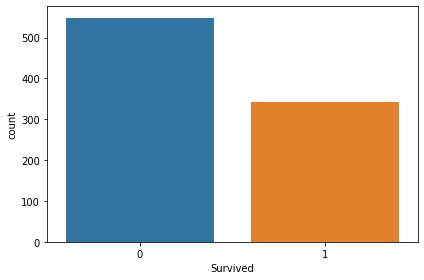

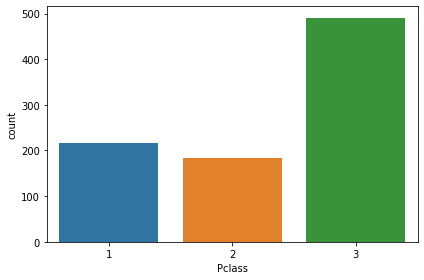

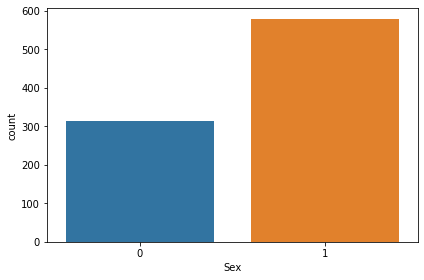

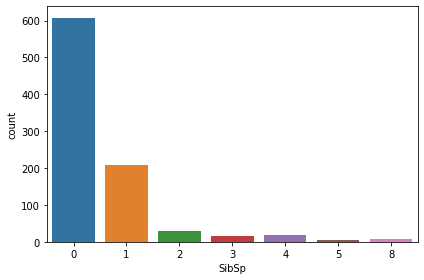

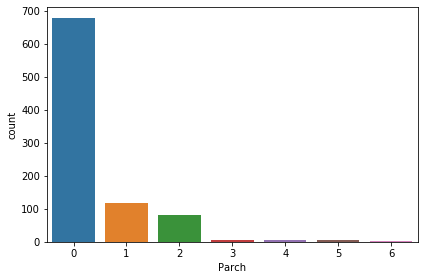

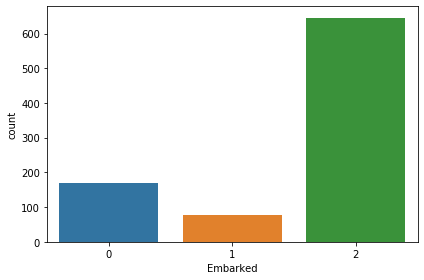

In [31]:
plt.figure(figsize=(30,30))
for i in col:
    plt.subplots()
    sns.countplot(tit[i])
    plt.tight_layout()

<Figure size 2160x2160 with 0 Axes>

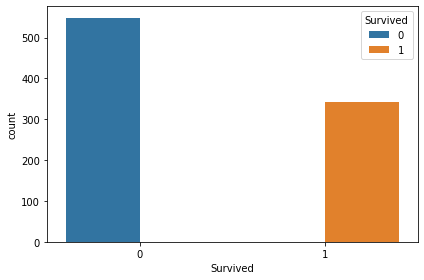

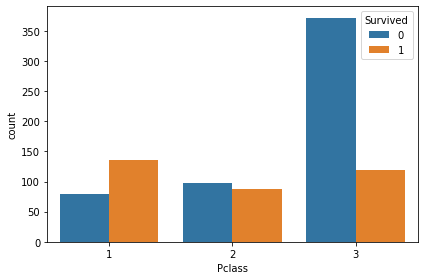

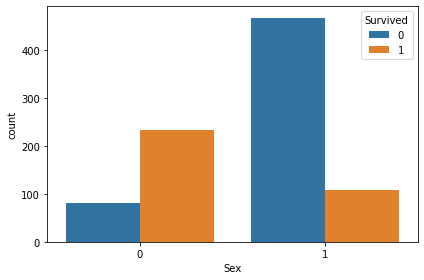

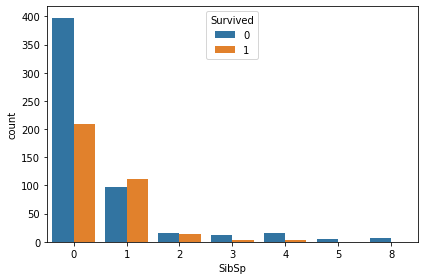

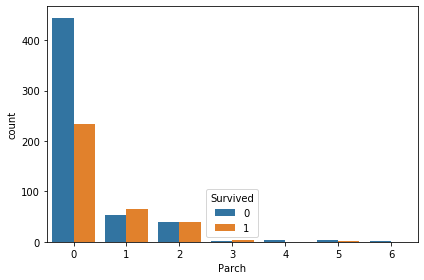

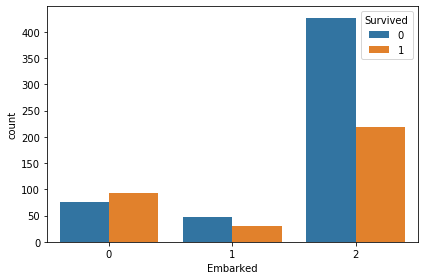

In [66]:
plt.figure(figsize=(30,30))
for i in col:
    plt.subplots()
    sns.countplot(tit[i], hue=tit['Survived'])
    plt.tight_layout()

In [34]:
# lineplot

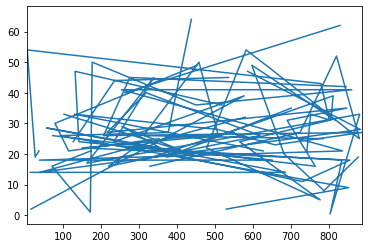

In [38]:
tit['Age'].sample(frac=0.15).plot()

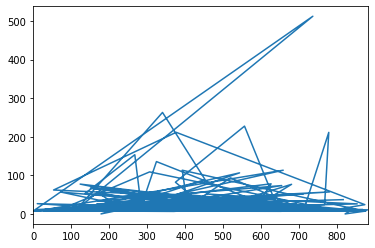

In [39]:
tit['Fare'].sample(frac=0.15).plot()

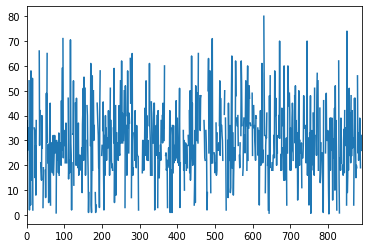

In [40]:
tit['Age'].plot()

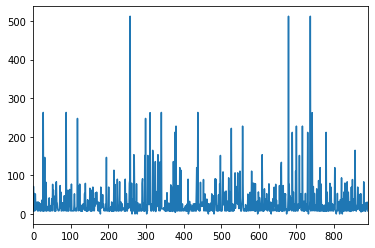

In [41]:
tit['Fare'].plot()

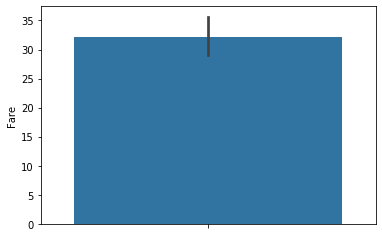

In [44]:
sns.barplot(data=tit, y='Fare', hue='Survived')

In [45]:
tit.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887,1.641166
1,444.368421,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408,1.368421


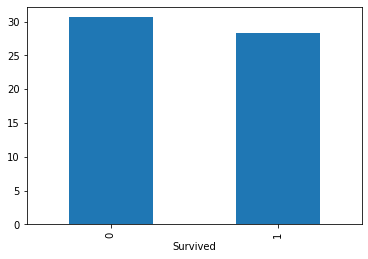

In [46]:
tit.groupby('Survived').mean()['Age'].plot.bar()

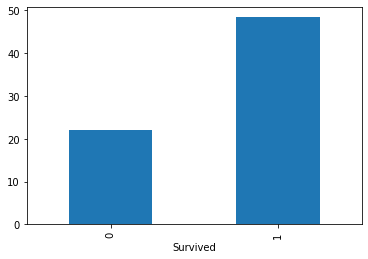

In [47]:
tit.groupby('Survived').mean()['Fare'].plot.bar()

In [53]:
tit.groupby('Survived').mean()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,,,,,,,,
0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887,1.641166
1,444.368421,1.950292,0.318713,28.343690,0.473684,0.464912,48.395408,1.368421


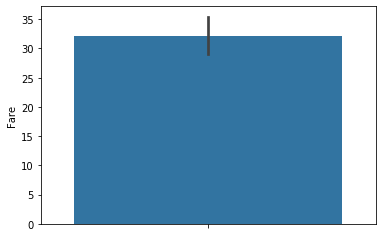

In [58]:
sns.barplot(data=tit, y='Fare', hue=['Survived', 'Sex'])

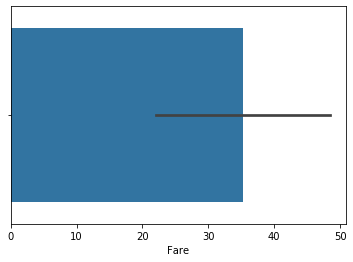

In [52]:
sns.barplot(x=tit.groupby('Survived').mean()['Fare'], hue=tit['Sex'])

In [74]:
col=tit.drop(["Name", "Ticket", "Cabin"], axis=1).columns.values
col

array(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'], dtype=object)

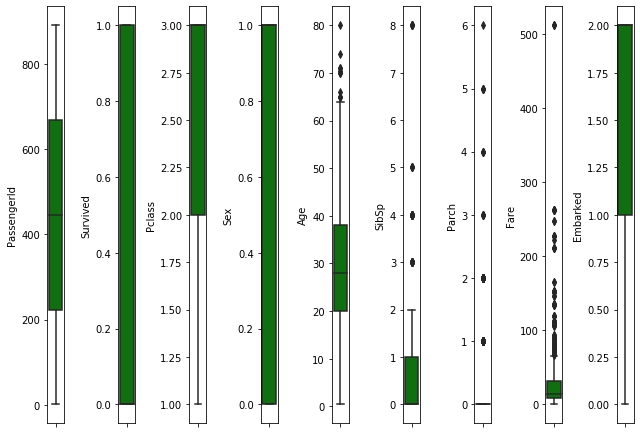

In [85]:
plt.figure(figsize=(9,54))
for i in range(len(col)):
    plt.subplot(9,9,i+1)
    sns.boxplot(tit[col[i]], orient='v', color='green')
    plt.tight_layout()

In [87]:
# We first need to handle the missing values

In [88]:
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [90]:
tit['Age']=tit['Age'].fillna(value=np.mean(tit['Age']))
tit['Age'].isnull().sum()

0

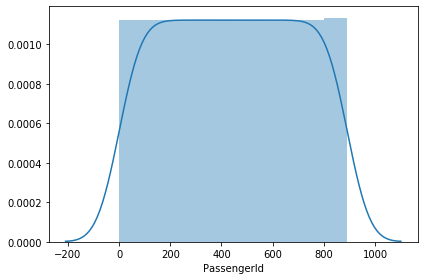

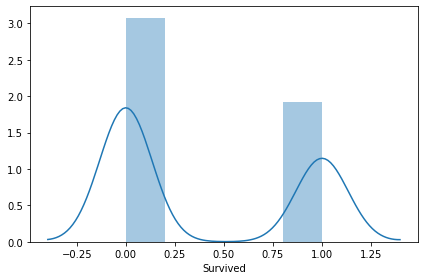

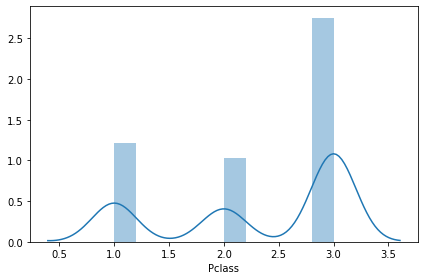

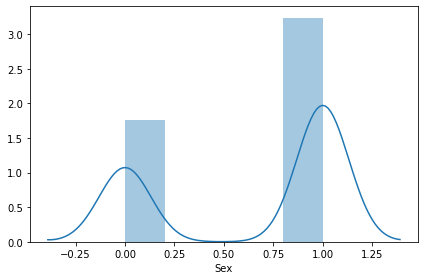

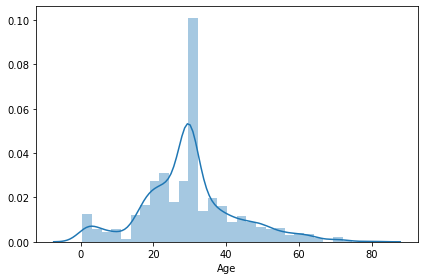

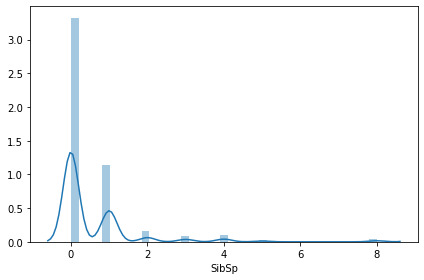

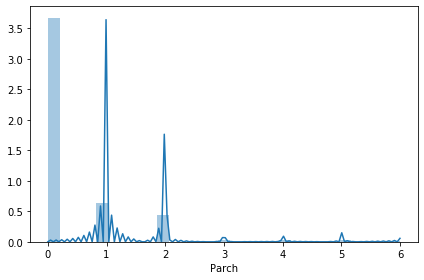

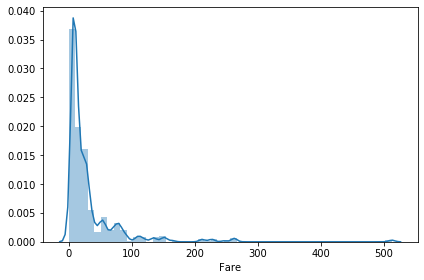

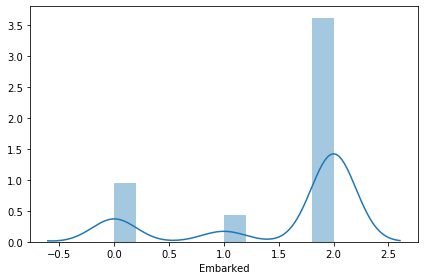

In [93]:
# plt.figure(figsize=(27,27))
for i in range(len(col)):
    plt.subplots()
    sns.distplot(tit[col[i]])
    plt.tight_layout()

In [94]:
tit.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

# Bivariate Analysis

In [103]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [96]:
pd.crosstab(tit['Survived'], tit['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [97]:
pd.crosstab(tit['Survived'], tit['Sex'])

Sex,0,1
Survived,,
0,81,468
1,233,109


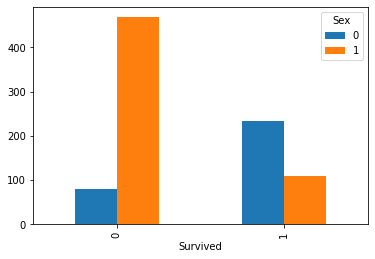

In [106]:
pd.crosstab(tit['Survived'], tit['Sex']).plot.bar()

In [98]:
pd.crosstab(tit['Survived'], tit['SibSp'])

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [99]:
pd.crosstab(tit['Survived'], tit['Parch'])

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


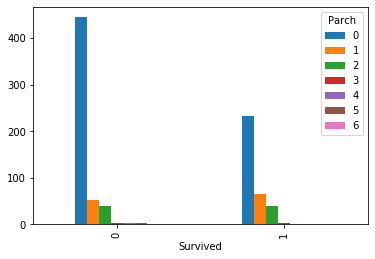

In [105]:
pd.crosstab(tit['Survived'], tit['Parch']).plot.bar()

In [100]:
pd.crosstab(tit['Survived'], tit['Embarked'])

Embarked,0,1,2
Survived,,,
0,75,47,427
1,93,30,219


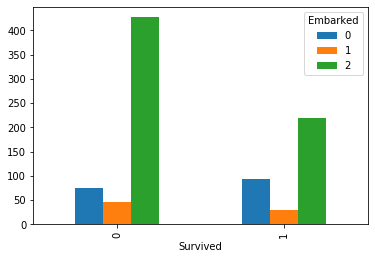

In [104]:
pd.crosstab(tit['Survived'], tit['Embarked']).plot.bar()

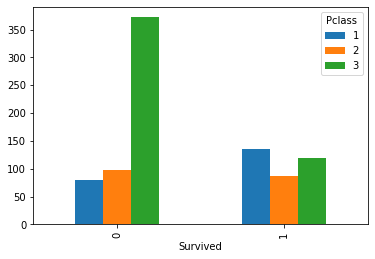

In [102]:
pd.crosstab(tit['Survived'], tit['Pclass']).plot.bar()

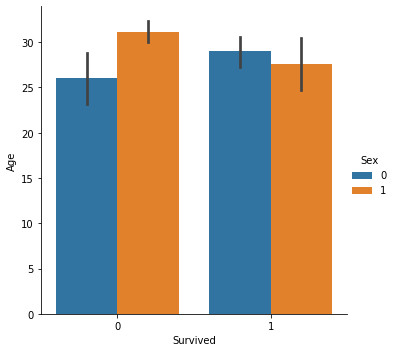

In [108]:
sns.catplot(data=tit, x='Survived', y='Age', kind='bar', hue='Sex')

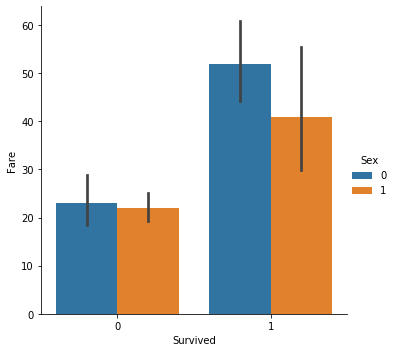

In [109]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='bar', hue='Sex')

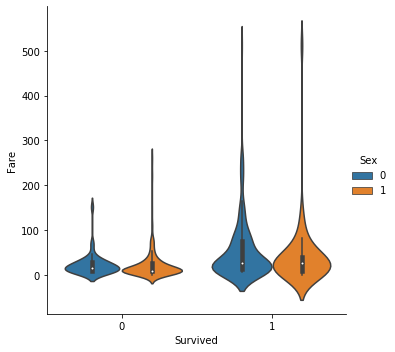

In [110]:
sns.catplot(data=tit, x='Survived', y='Fare', kind='violin', hue='Sex')

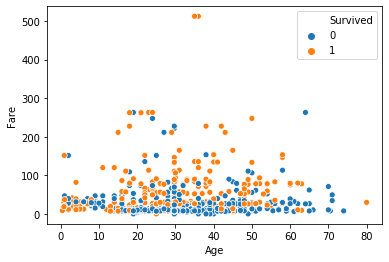

In [113]:
sns.scatterplot(data=tit, x='Age', y='Fare', hue='Survived')

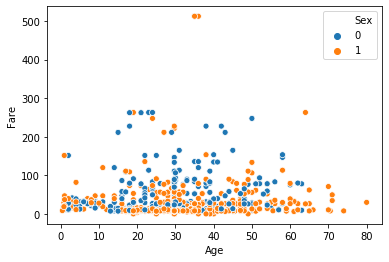

In [114]:
sns.scatterplot(data=tit, x='Age', y='Fare', hue='Sex')

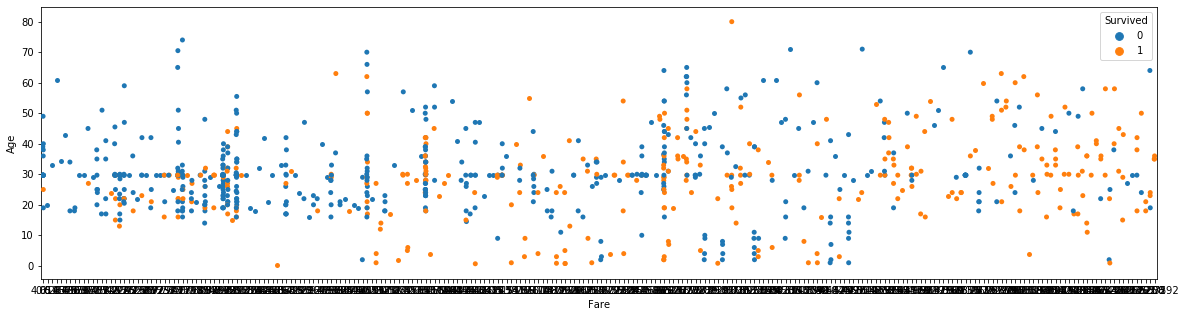

In [118]:
plt.figure(figsize=(20,5))
sns.stripplot(data=tit, y='Age', x='Fare', hue='Survived')

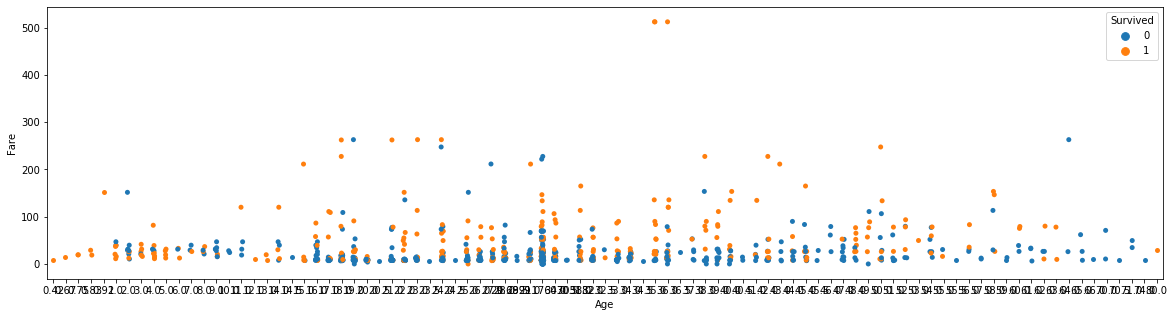

In [119]:
plt.figure(figsize=(20,5))
sns.stripplot(data=tit, x='Age', y='Fare', hue='Survived')
# the curve strips x axis

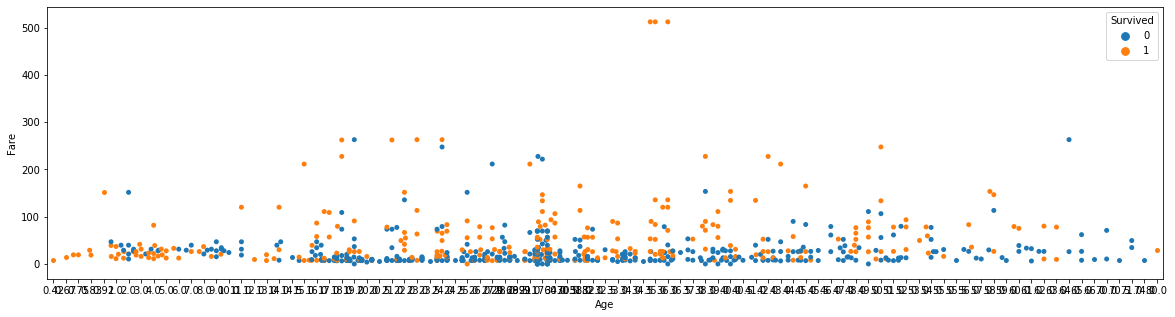

In [120]:
plt.figure(figsize=(20,5))
sns.swarmplot(data=tit, x='Age', y='Fare', hue='Survived')

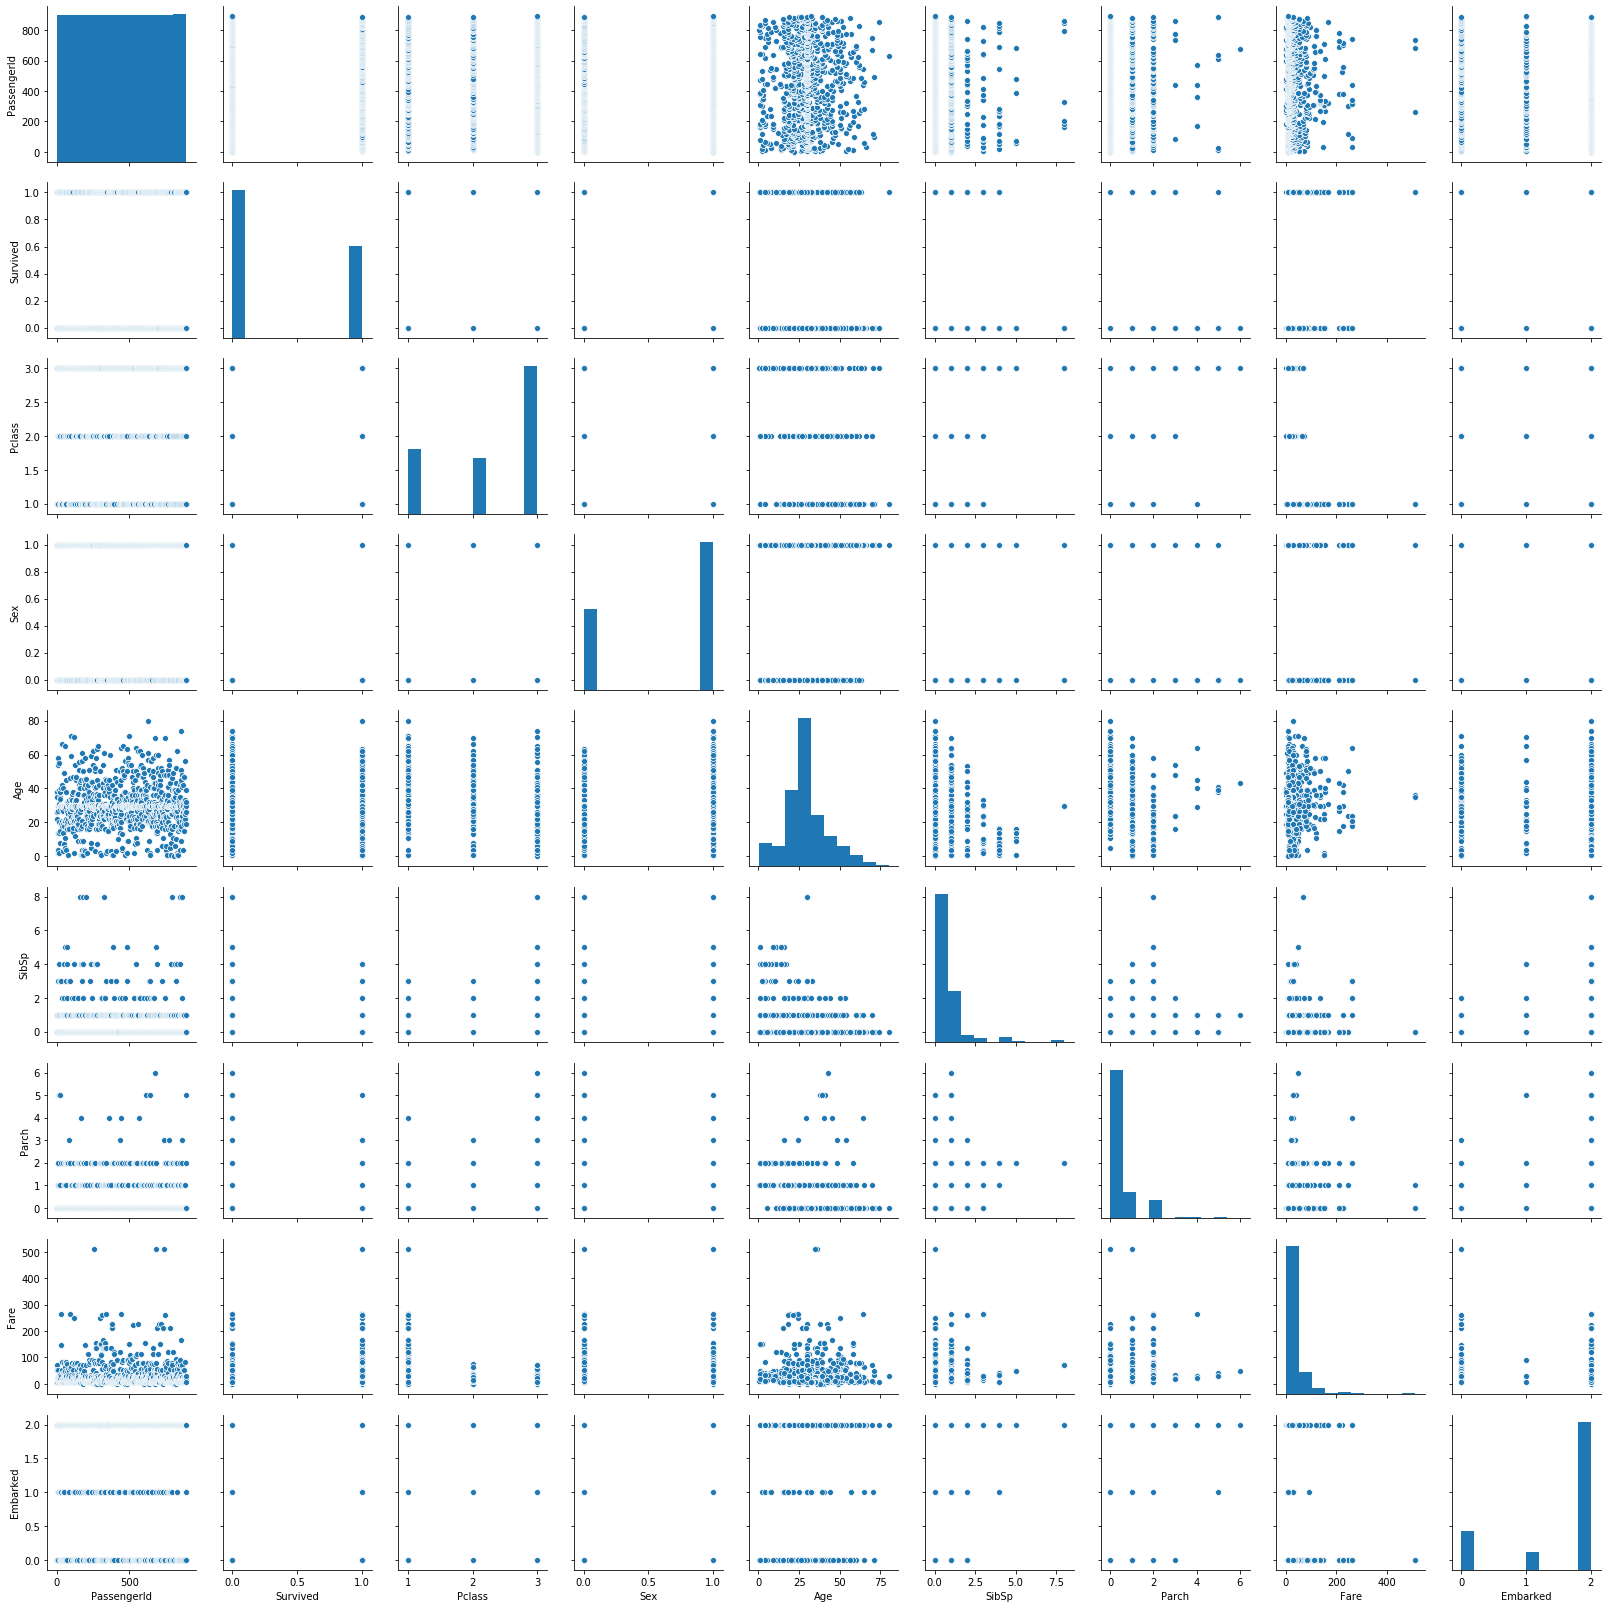

In [121]:
sns.pairplot(tit)

C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dell\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


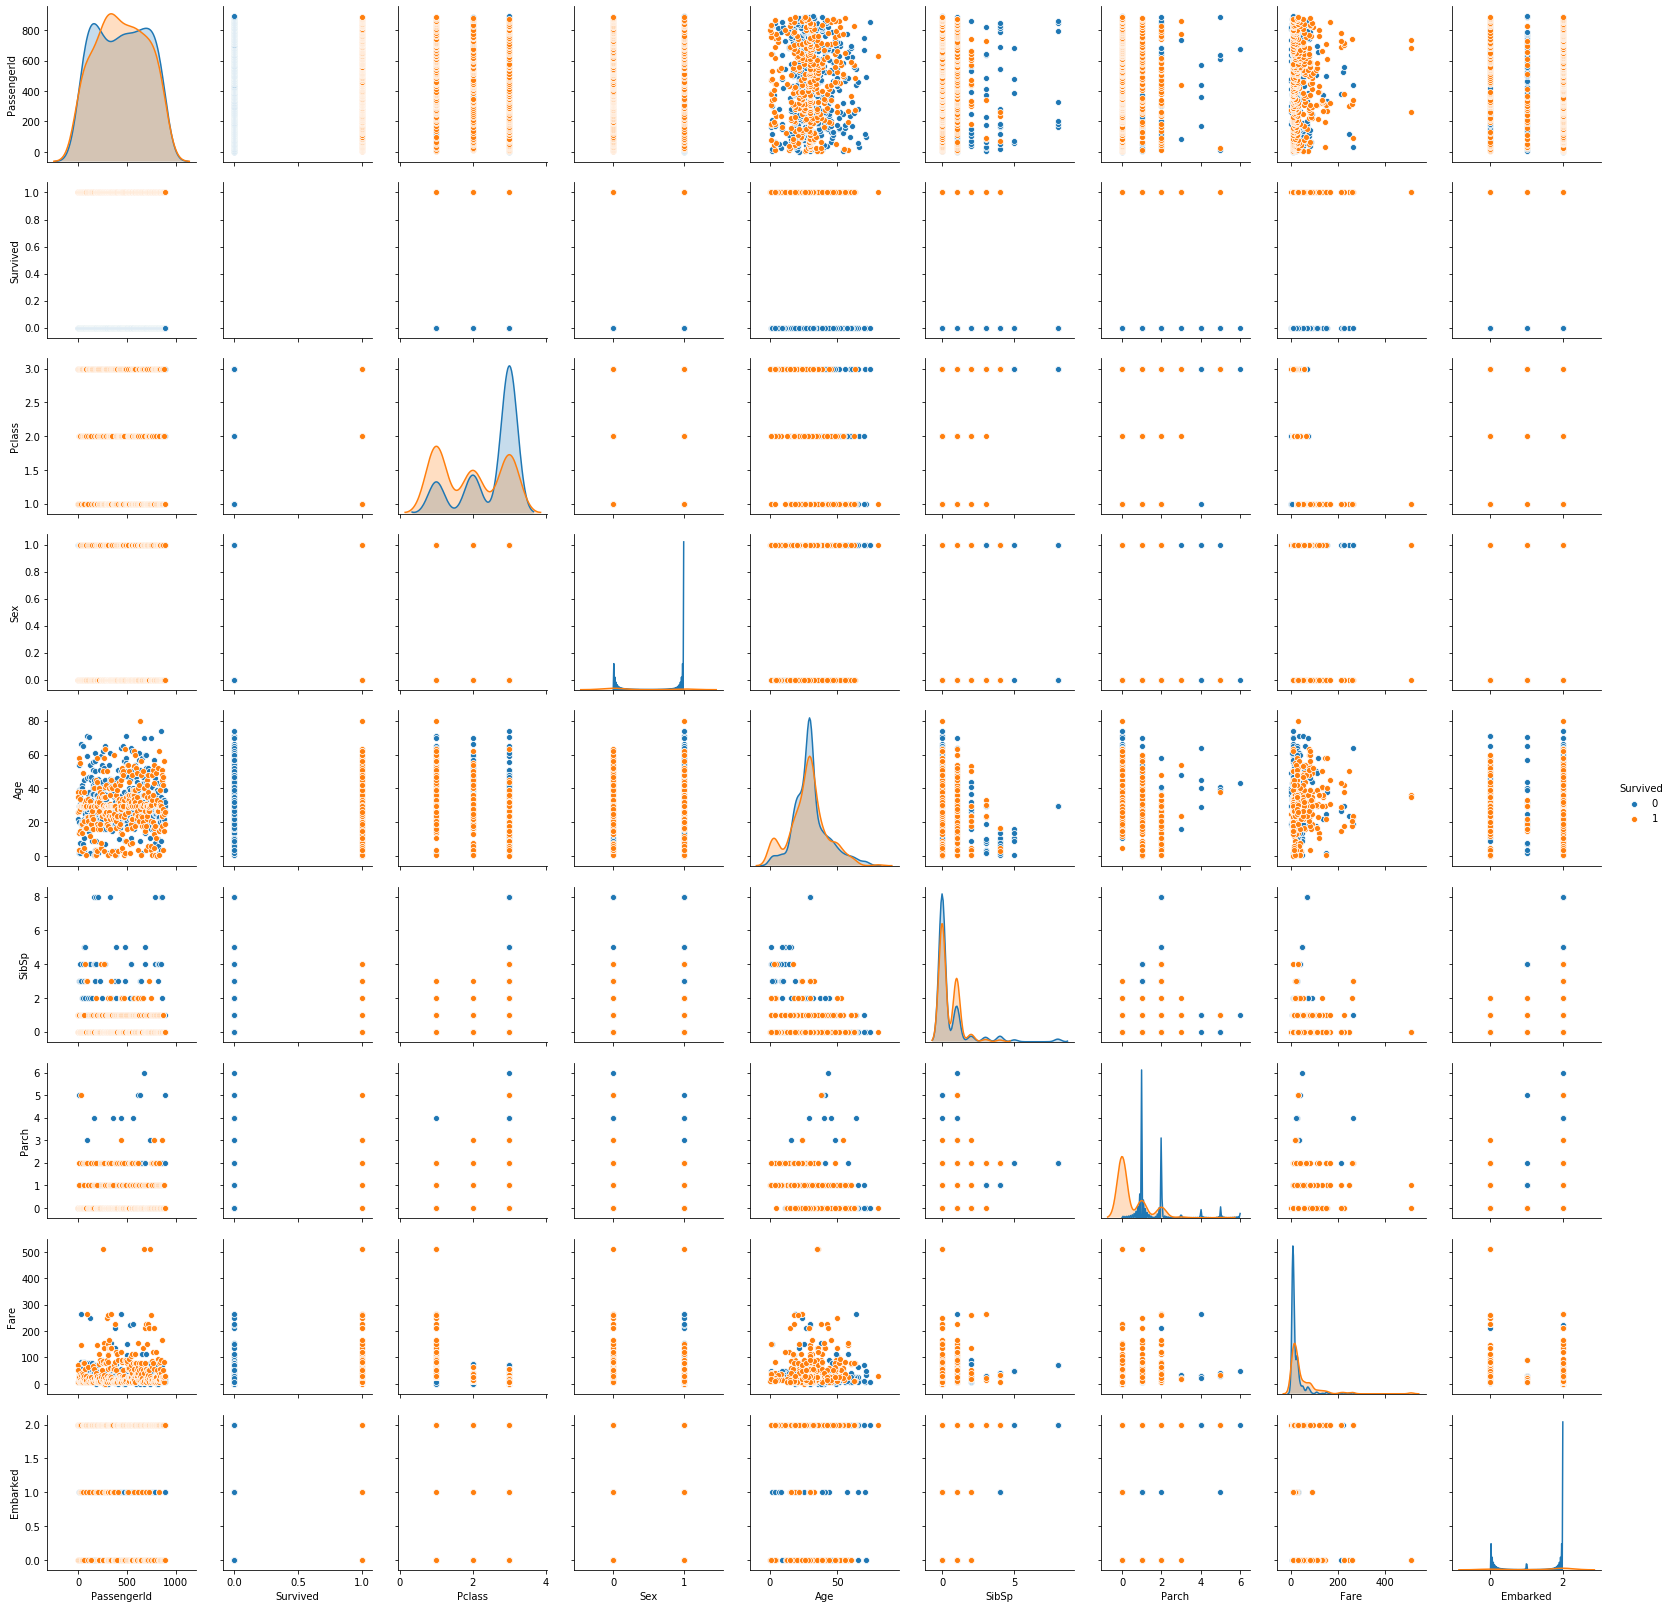

In [122]:
sns.pairplot(tit, hue='Survived')

In [123]:
tit.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


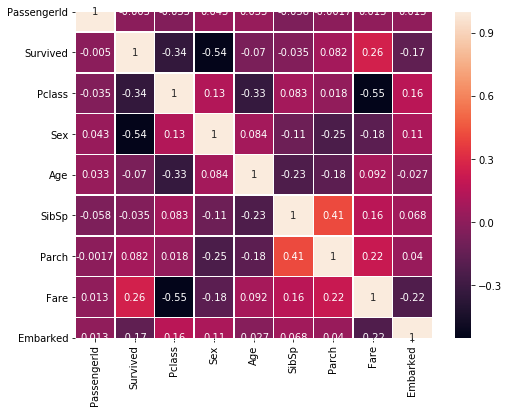

In [134]:
plt.figure(figsize=(8,6))
sns.heatmap(tit.corr(), annot=True, linewidths=.5, square=False, cbar=True)

In [135]:
tit.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64